In [1]:
import parse_sdf_utils
from rdkit import Chem

In [7]:
mol_list = parse_sdf_utils.get_sdf_to_mol('/mnt/storage/NIST_zipped/NIST14/mainlib_mend.sdf')


W0604 14:32:15.993949 140708758136576 parse_sdf_utils.py:114] Number of failed molblocks : 2289


In [104]:
len(mol_list)

240113

In [2]:
mol_list_17 = parse_sdf_utils.get_sdf_to_mol('/mnt/storage/NIST_zipped/NIST17/mainlib_mend.sdf')

W0612 18:27:17.958930 140663908443904 parse_sdf_utils.py:114] Number of failed molblocks : 1805


## Split subgroup into portions

265505

## Scaffold experiment

In [20]:
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit.Chem.Draw import IPythonConsole


In [12]:
scaffold_dict = {}

for mol in mol_list:
    scaffold_smiles = MurckoScaffold.MurckoScaffoldSmiles(Chem.MolToSmiles(mol))
    if scaffold_smiles in scaffold_dict:
        scaffold_dict[scaffold_smiles].append(mol)
    else:
        scaffold_dict[scaffold_smiles] = [mol]

RDKit WARNING: [14:57:24] Conflicting single bond directions around double bond at index 1.
RDKit WARNING: [14:57:24]   BondStereo set to STEREONONE and single bond directions set to NONE.
RDKit WARNING: [14:57:25] Conflicting single bond directions around double bond at index 4.
RDKit WARNING: [14:57:25]   BondStereo set to STEREONONE and single bond directions set to NONE.
RDKit WARNING: [14:57:35] Conflicting single bond directions around double bond at index 1.
RDKit WARNING: [14:57:35]   BondStereo set to STEREONONE and single bond directions set to NONE.
RDKit WARNING: [14:57:38] Conflicting single bond directions around double bond at index 15.
RDKit WARNING: [14:57:38]   BondStereo set to STEREONONE and single bond directions set to NONE.
RDKit WARNING: [14:57:39] Conflicting single bond directions around double bond at index 2.
RDKit WARNING: [14:57:39]   BondStereo set to STEREONONE and single bond directions set to NONE.
RDKit WARNING: [14:57:40] Conflicting single bond dire

In [76]:
scaffold_dict_17 = {}

for mol in mol_list_17:
    scaffold_smiles = MurckoScaffold.MurckoScaffoldSmiles(Chem.MolToSmiles(mol))
    if scaffold_smiles in scaffold_dict_17:
        scaffold_dict_17[scaffold_smiles].append(mol)
    else:
        scaffold_dict_17[scaffold_smiles] = [mol]

RDKit WARNING: [16:02:22] Conflicting single bond directions around double bond at index 1.
RDKit WARNING: [16:02:22]   BondStereo set to STEREONONE and single bond directions set to NONE.
RDKit WARNING: [16:02:22] Conflicting single bond directions around double bond at index 1.
RDKit WARNING: [16:02:22]   BondStereo set to STEREONONE and single bond directions set to NONE.
RDKit WARNING: [16:02:23] Conflicting single bond directions around double bond at index 1.
RDKit WARNING: [16:02:23]   BondStereo set to STEREONONE and single bond directions set to NONE.
RDKit WARNING: [16:02:23] Conflicting single bond directions around double bond at index 4.
RDKit WARNING: [16:02:23]   BondStereo set to STEREONONE and single bond directions set to NONE.
RDKit WARNING: [16:02:29] Conflicting single bond directions around double bond at index 4.
RDKit WARNING: [16:02:29]   BondStereo set to STEREONONE and single bond directions set to NONE.
RDKit WARNING: [16:02:29] Conflicting single bond direc

In [16]:
len(scaffold_dict['c1ccc(CCN2CCC(Nc3ccccc3)CC2)cc1'])

31

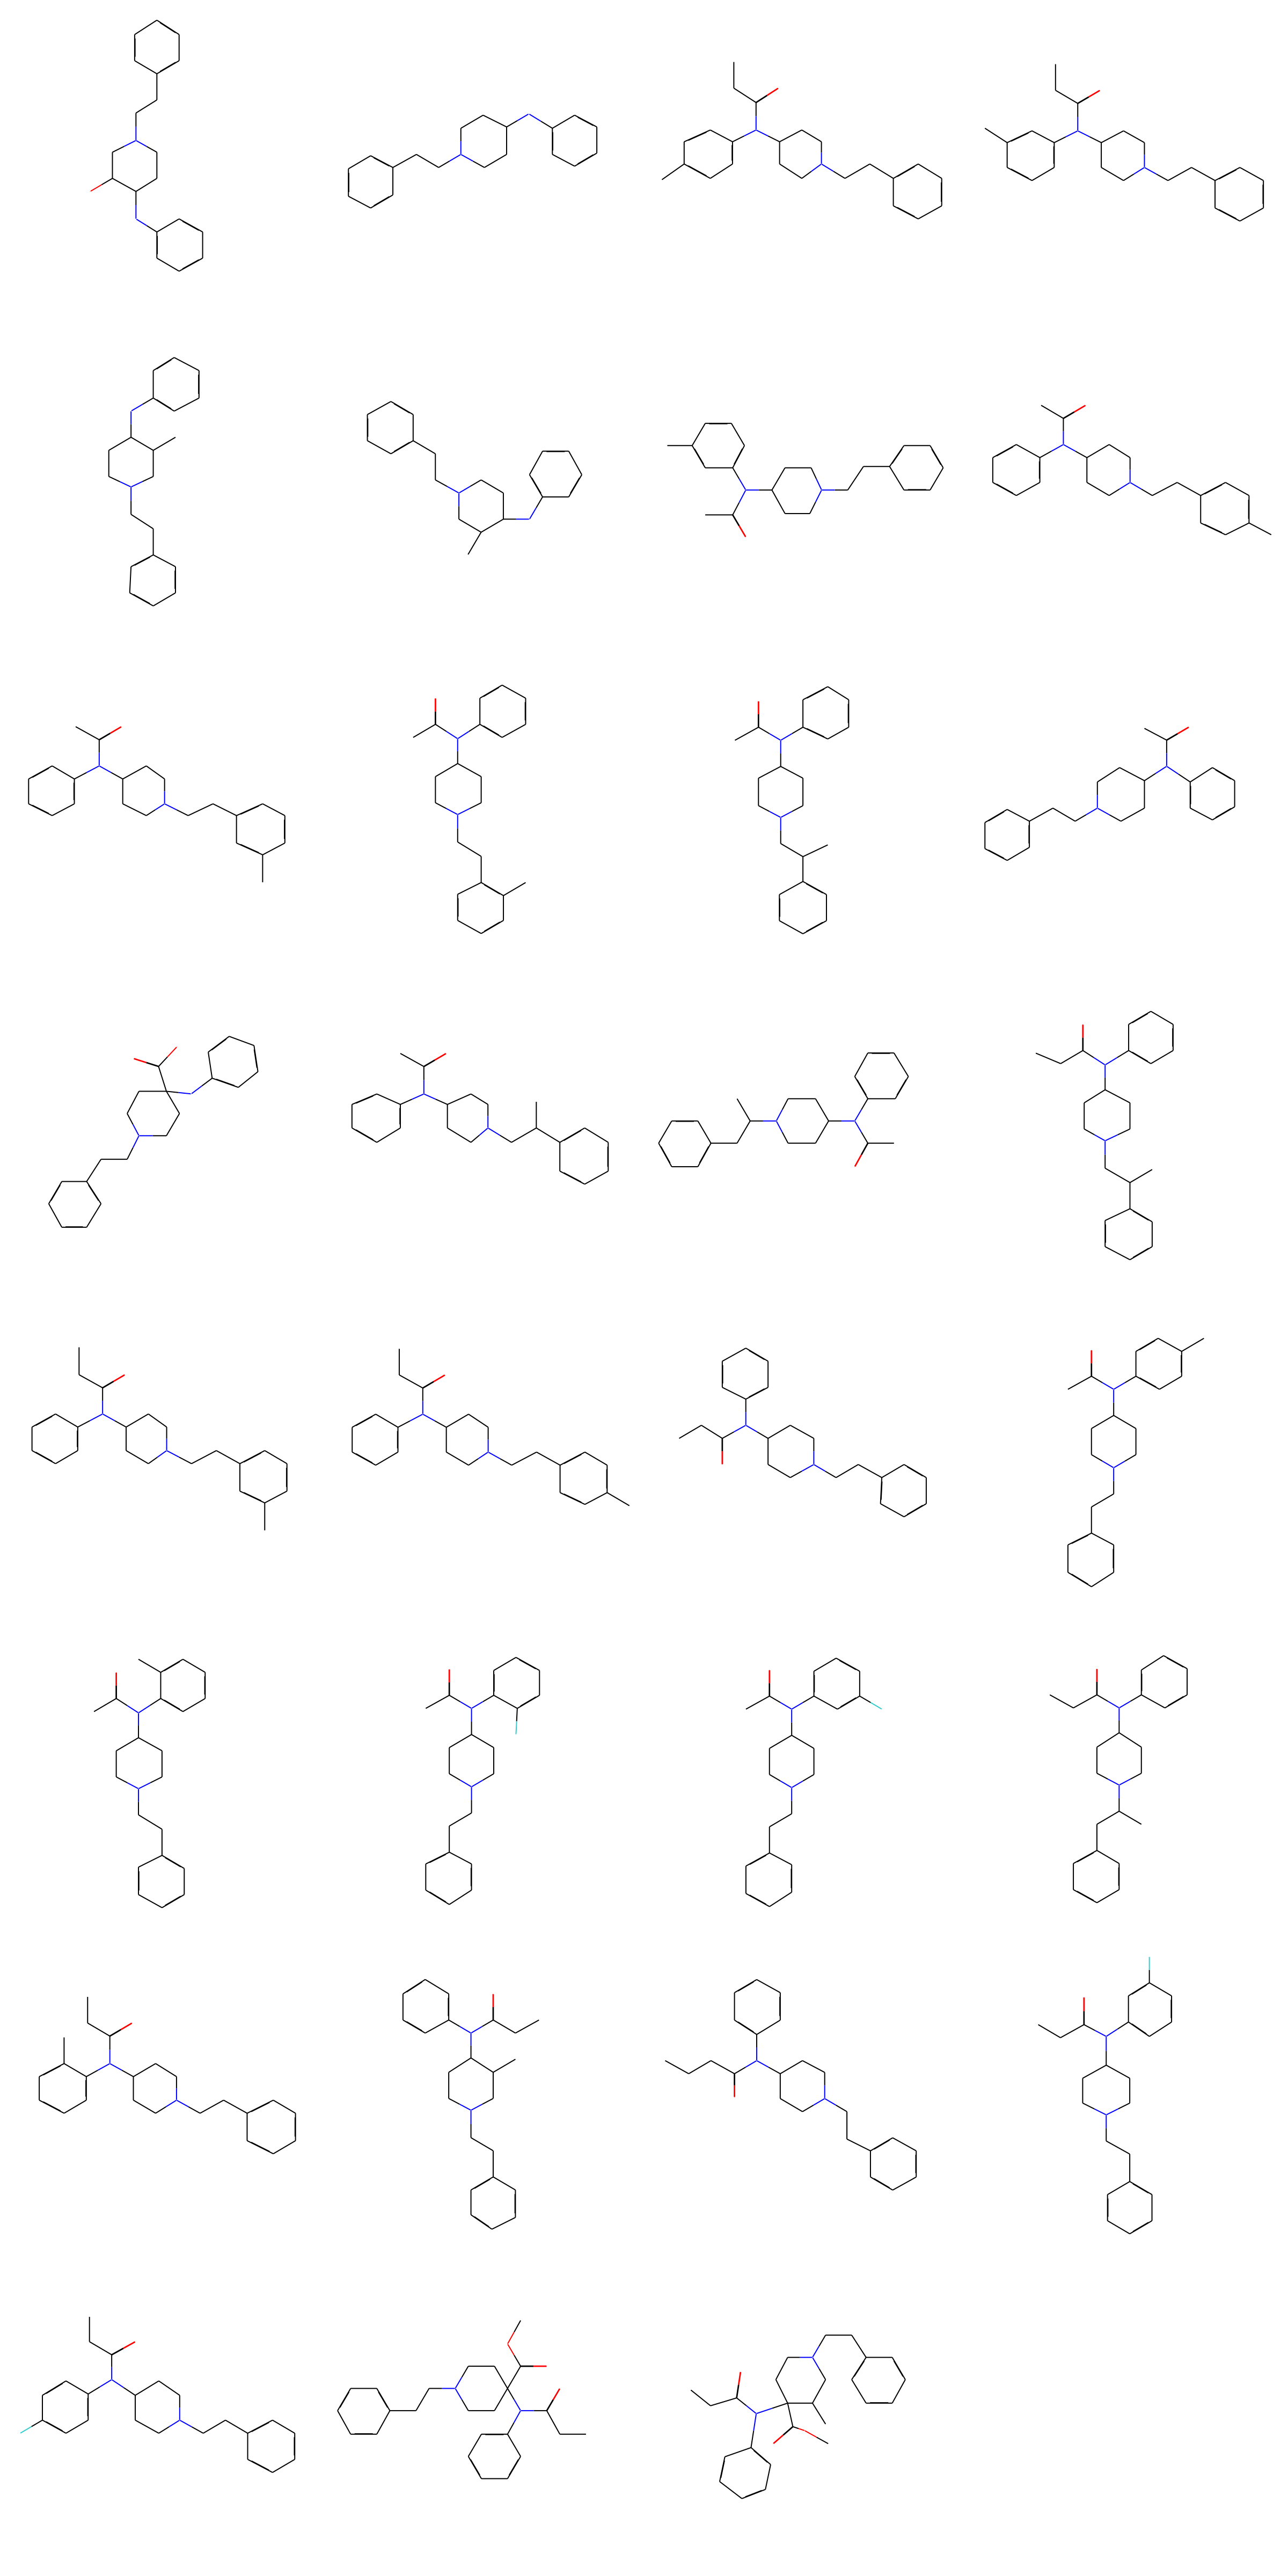

In [42]:
fentanyl_shared_backbone_list = scaffold_dict['c1ccc(CCN2CCC(Nc3ccccc3)CC2)cc1']
# Chem.Draw.MolsToGridImage(fentanyl_shared_backbone_list,legends=[mol.GetProp('_Name') for mol in fentanyl_shared_backbone_list])
Chem.Draw.MolsToGridImage(fentanyl_shared_backbone_list, subImgSize=(600,600), molsPerRow=4)



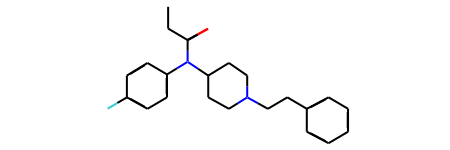

In [73]:
#i = 0
i += 1
fentanyl_shared_backbone_list[i]


In [74]:
len(fentanyl_shared_backbone_list)

31

In [85]:
fentanyl_17_shared_backbone_list = scaffold_dict['c1ccc(CCN2CCC(Nc3ccccc3)CC2)cc1']
len(fentanyl_17_shared_backbone_list)

31

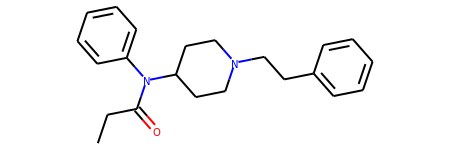

In [44]:
Chem.MolFromSmiles('O=C(CC)N(C1CCN(CC1)CCc2ccccc2)c3ccccc3')

## Differences between NIST 17 and NIST 14

In [89]:
in17_not14 = list(set(scaffold_dict_17.keys()) - set(scaffold_dict.keys()))
print(len(in17_not14))

2485


In [94]:
in14_not17 = list(set(scaffold_dict.keys()) - set(scaffold_dict_17.keys()))
print(len(in14_not17))

656


In [97]:
in17_not14_mols = [Chem.MolFromSmiles(mol) for mol in in17_not14]

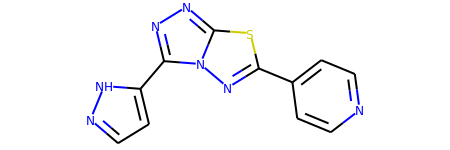

In [100]:
in17_not14_mols[2484]

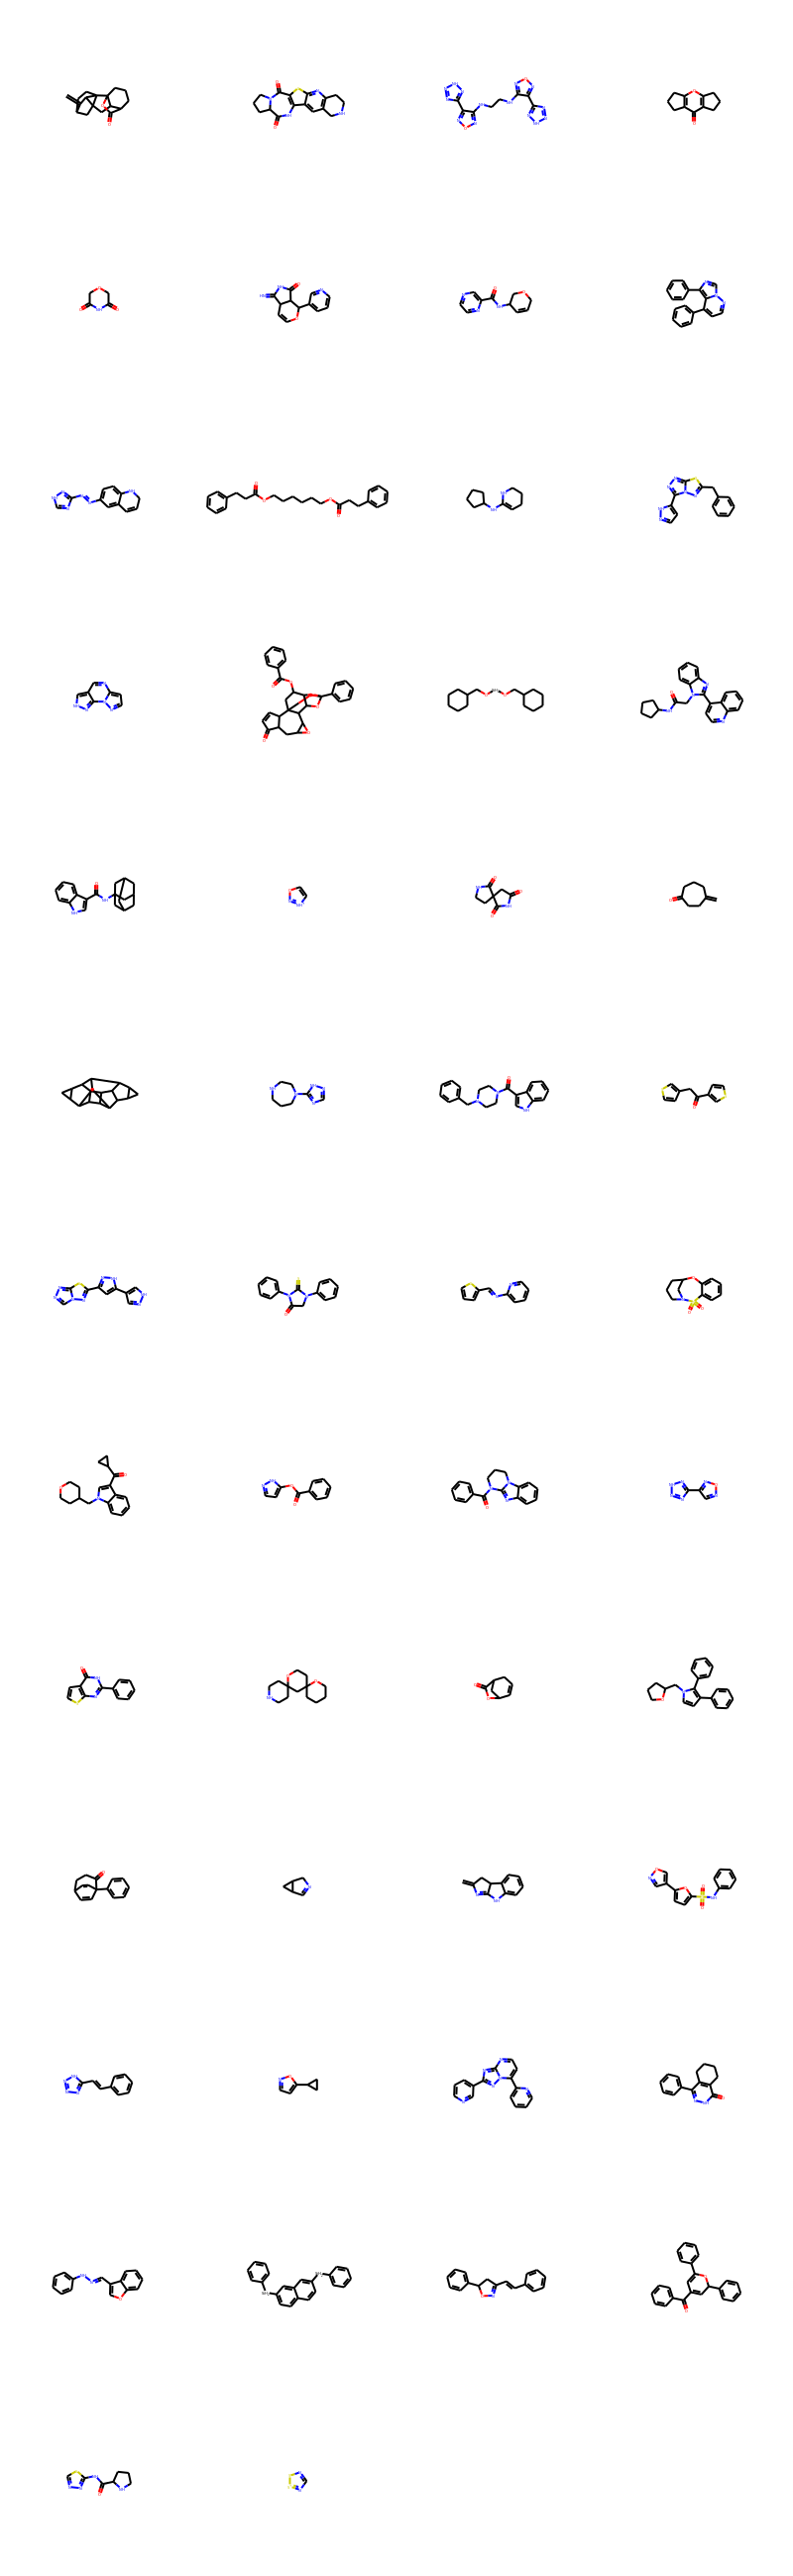

In [101]:
Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(mol) for mol in in17_not14], molsPerRow=4)

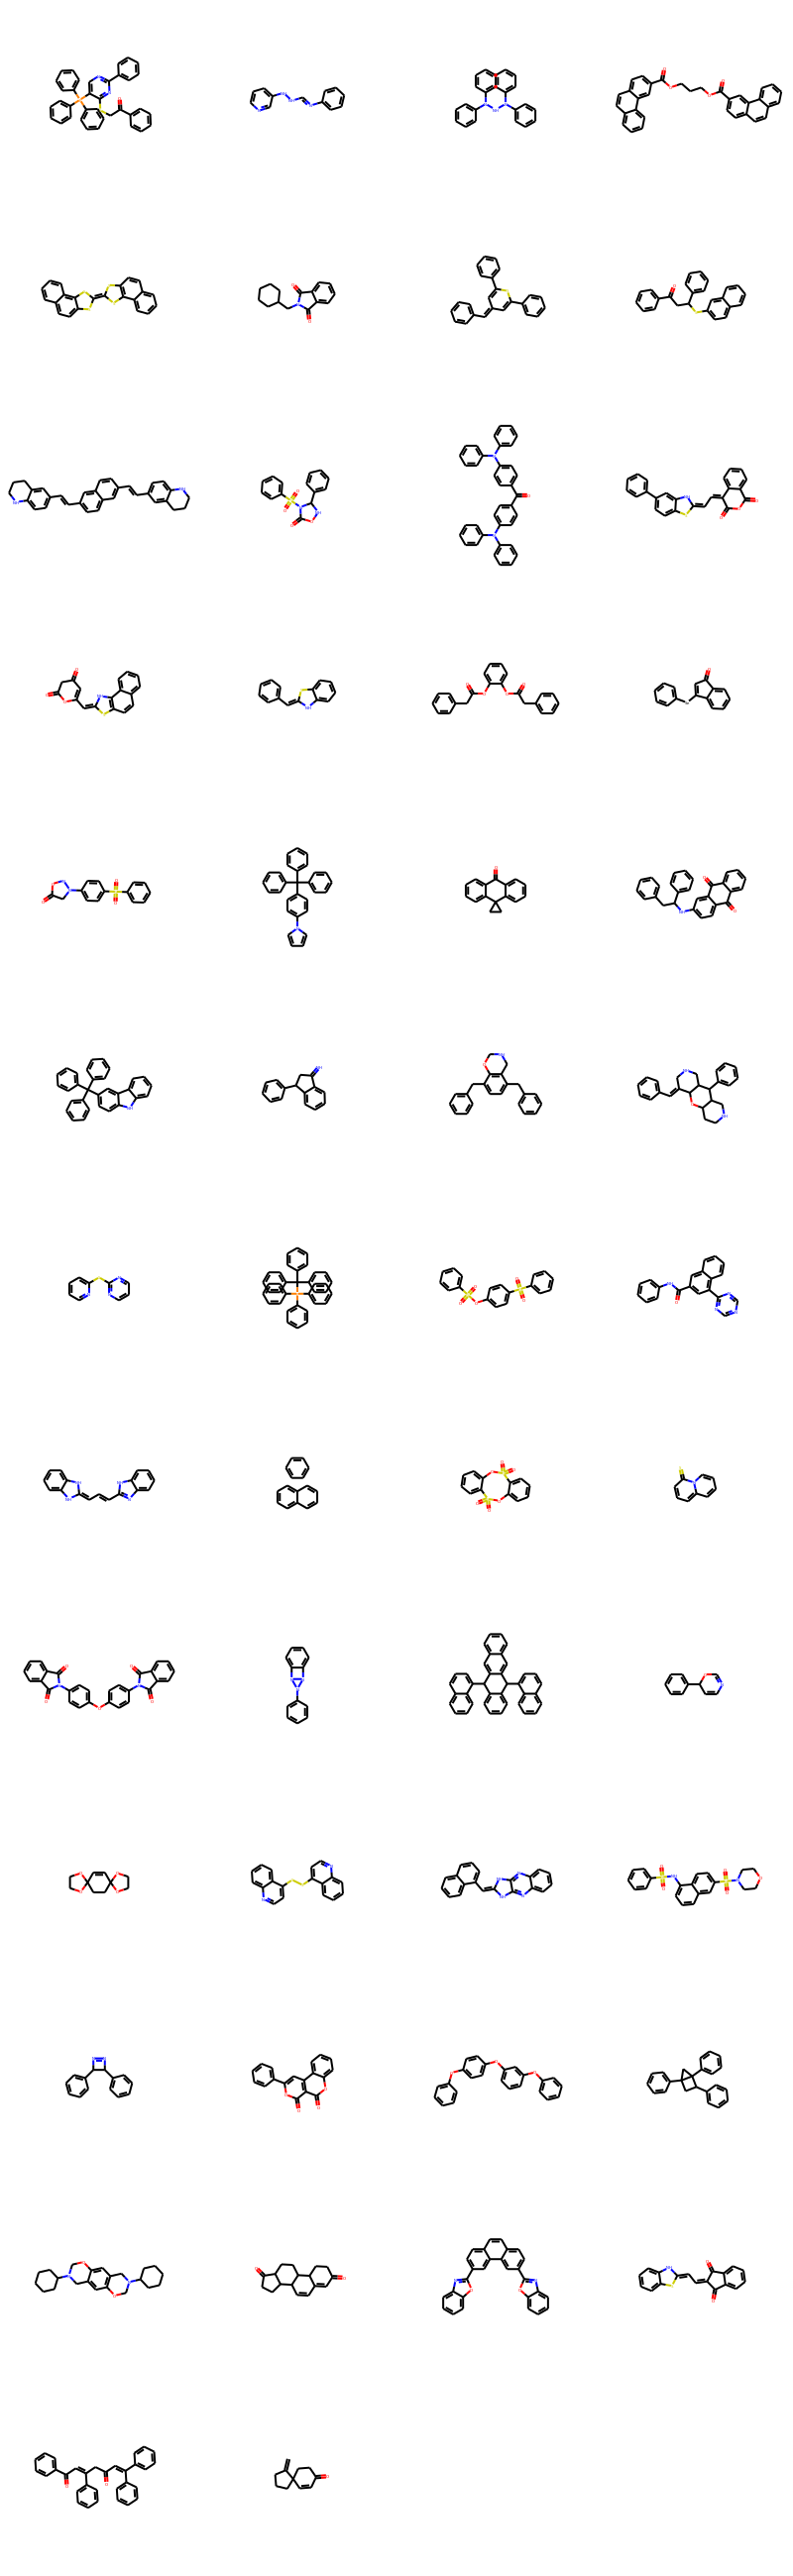

In [95]:
Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(mol) for mol in in14_not17], molsPerRow=4)